### 8. Coefficient of Variation workflow

Get the coefficient of variation starting with the corporate employment workflow here.

In [1]:
import pandas as pd
import numpy as np

In [4]:
# first do everything with the education background

director_education_df = pd.read_csv("raw_data/boardex_director_education_data_comp_net_2011_2023.csv", index_col= 0)

In [5]:
director_education_df.head()

,rowtype,directorname,companyname,qualification,fulltextdescription,directorid,companyid,awarddate
0,Education,George Morrow,Bryn Mawr College,MS,NaN,826.0,60227.0,1977-01-01
1,Education,George Morrow,Fuqua School of Business Duke University,MBA,NaN,826.0,730113.0,1981-01-01
2,Education,George Morrow,Southampton College Long Island University,BS,NaN,826.0,2925217.0,1974-01-01
3,Education,Chris Viehbacher,American Institute of Certified Public Account...,Certified Public Accountant,NaN,1026.0,54373.0,NaN
4,Education,Chris Viehbacher,Canadian Institute of Chartered Accountants (C...,Chartered Accountant,NaN,1026.0,56019.0,NaN


In [32]:
# problem missing data doesn't match - so that's a problem!!

director_education_df.awarddate.isna().sum()

np.int64(2790)

In [33]:
director_education_df.shape

(8345, 8)

Get the link the portfolio company per each year, get firm level details from one of the other dataframe

This will also need to be the structure to get the panel data structure also.

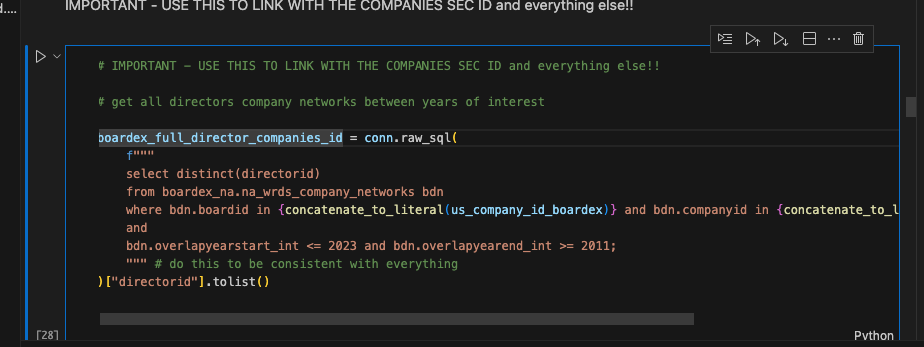

Need to join the company data from before, and add it together.

In [6]:
# boardex_company_networks_us_df.to_csv("raw_data/boardex_company_network_2011_2023.csv")

# get boardex company networks to link everything together

In [9]:
boardex_company_networks_us_df = pd.read_csv("raw_data/boardex_company_network_2011_2023.csv", index_col= 0)

In [10]:
boardex_company_networks_us_df.head(2)

,associationtype,boardname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,conncompanyorgtype,boardid,...,roletitle,roleboardposition,roleedflag,overlapyearstart_int,overlapyearend_int,startcompanydatestartrole,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,CONTRAFECT CORP (De-listed 11/2023),Doctor Steve Gilman,2016,2017,Independent Director (Brd) (SD),Chairman/President/CEO (Brd) (ED),Quoted,401.0,...,Independent Director,Brd,SD,2016,2017,2015-01-06,NaN,2016-07-21,2017-03-16,Quoted
1,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,CONTRAFECT CORP (De-listed 11/2023),Doctor Steve Gilman,2019,2022,Independent Director (Brd) (SD),Vice Chairman (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2019,2022,2015-01-06,NaN,2019-04-02,2022-01-01,Quoted


No this is wrong, we need to use the graph statistics df with directors on one side

### IMPORTANT: Linking results

You can get the results together, for the education and also for employment.

Try the employment first to get the diversity measure - as a dataframe, 

Create a `features` folder, with coefficient of variation together

We need to have company director year workflow

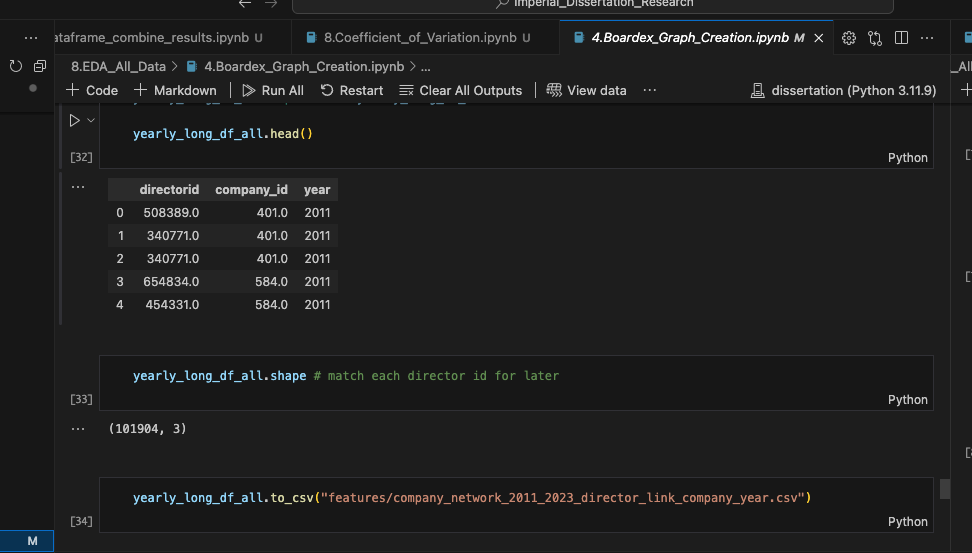

In [52]:
# load from the features folder that's it.

company_df_year_long_df = pd.read_csv("features/company_network_2011_2023_director_link_company_year.csv", index_col= 0)

In [53]:
company_df_year_long_df.shape # repeated can then start with this and link appropriately with a left join

(101904, 3)

#### 2. Get the merged dataframe

Do for each dataframe for education and then occupation

In [54]:
# then do the preprocessing that happens afterwards.

In [55]:
company_df_year_long_df = company_df_year_long_df.drop_duplicates()

In [56]:
company_df_year_long_df[company_df_year_long_df["directorid"].eq(340771.0) & company_df_year_long_df["company_id"].eq(401.0)]

,directorid,company_id,year
1,340771.0,401.0,2011
1,340771.0,401.0,2012
1,340771.0,401.0,2013


Education workflow

Need to add the code to iteratively run for each year perhaps to get the diversity measure.

In [57]:
merged_education_df = pd.merge(company_df_year_long_df, director_education_df, on="directorid")

In [58]:
merged_education_df.awarddate.iloc[0]

'1972-01-01'

In [59]:
def extract_year(row):
    if pd.notnull(row['awarddate']):
        return pd.to_datetime(row['awarddate']).year
    else:
        return row['year']

Given missing year - then treat current year as the extracted year>

In [60]:
merged_education_df["awardyear"] = merged_education_df.apply(extract_year, axis = 1)

# there are missing dates - for the education diversity - so maybe not take into account of the dates?

In [61]:
merged_education_df

,directorid,company_id,year,rowtype,directorname,companyname,qualification,fulltextdescription,companyid,awarddate,awardyear
0,340771.0,401.0,2011,Education,Doctor Robert Zerbe,Indiana University,BA,NaN,60920.0,1972-01-01,1972
1,340771.0,401.0,2011,Education,Doctor Robert Zerbe,Indiana University,Postgraduate Degree,NaN,60920.0,NaN,2011
2,340771.0,401.0,2011,Professional Qualifications,Doctor Robert Zerbe,National Institute of Mental Health (NIMH) (USA),Attended,NaN,66506.0,NaN,2011
3,340771.0,401.0,2011,Education,Doctor Robert Zerbe,Indiana University School of Medicine,MD,NaN,78527.0,1975-01-01,1975
4,654834.0,584.0,2011,Education,Doctor Stephen Howell,University of Chicago,AB Degree,NaN,42092.0,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...
78292,1127127.0,3034902.0,2022,Education,Doctor Peter Diamandis,Massachusetts Institute of Technology (MIT),MS,NaN,40436.0,1987-05-01,1987
78293,1127127.0,3034902.0,2022,Education,Doctor Peter Diamandis,International Space University,PhD,NaN,571815.0,NaN,2022
78294,1127127.0,3034902.0,2022,Education,Doctor Peter Diamandis,Harvard Medical School Harvard University,MD,NaN,63348.0,1989-05-01,1989
78295,346068.0,9831.0,2022,Education,Doctor Stanley Plotkin,New York University (NYU),BA,NaN,61424.0,NaN,2022


In [93]:
# filter the details for entries that are equal or less than the year

# then do the configuration from before.

merged_education_df = merged_education_df[merged_education_df["awardyear"]<= merged_education_df["year"]]

In [94]:
qualification_count_df = merged_education_df[["directorid", "company_id","year", "qualification"]].groupby(["company_id",	"year", "directorid"]).count().reset_index()

qualification_count_df

,company_id,year,directorid,qualification
0,401.0,2011,340771.0,4
1,401.0,2011,604938.0,6
2,401.0,2012,334519.0,4
3,401.0,2012,340771.0,4
4,401.0,2013,334519.0,4
...,...,...,...,...
27745,3596970.0,2022,1903956.0,3
27746,3596970.0,2022,2437628.0,2
27747,3598524.0,2022,104992.0,6
27748,3598524.0,2022,346277.0,3


From the above then calculate the average and standard deviation of qualifications by year and others.

In [95]:
# process the details

qualification_count_df = qualification_count_df[["company_id","year", "qualification"]].groupby(["company_id", "year"]).agg(["std", "mean"]).reset_index()

qualification_count_df.columns = ['_'.join(col).strip() for col in qualification_count_df.columns.values]

In [98]:
# ['_'.join(col).strip() for col in qualification_count_df.columns.values]

In [99]:
# https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns

In [100]:
qualification_count_df

,company_id_,year_,qualification_std,qualification_mean
0,401.0,2011,1.414214,5.00
1,401.0,2012,0.000000,4.00
2,401.0,2013,0.000000,4.00
3,401.0,2014,NaN,4.00
4,401.0,2015,0.816497,3.00
...,...,...,...,...
5710,3574318.0,2022,1.581139,3.00
5711,3582209.0,2022,1.414214,3.00
5712,3596970.0,2021,0.500000,2.25
5713,3596970.0,2022,0.547723,2.40


In [102]:
# calculate the coefficient of variation below

In [103]:
# get everything by year here


qualification_count_df["coefficient_of_variation"] = qualification_count_df["qualification_std"] / qualification_count_df["qualification_mean"]

In [105]:
qualification_count_df

,company_id_,year_,qualification_std,qualification_mean,coefficient_of_variation
0,401.0,2011,1.414214,5.00,0.282843
1,401.0,2012,0.000000,4.00,0.000000
2,401.0,2013,0.000000,4.00,0.000000
3,401.0,2014,NaN,4.00,NaN
4,401.0,2015,0.816497,3.00,0.272166
...,...,...,...,...,...
5710,3574318.0,2022,1.581139,3.00,0.527046
5711,3582209.0,2022,1.414214,3.00,0.471405
5712,3596970.0,2021,0.500000,2.25,0.222222
5713,3596970.0,2022,0.547723,2.40,0.228218


In [104]:
qualification_count_df.to_csv("features/company_education_coefficient_of_variation.csv")

In [101]:
# qualification_count_df.columns

In [78]:
# calculate mean and standard deviation by firm

# filter the result here


# try the same approach with the education also

#### Education information

Checking the education background information



In [36]:
education_coefficient_df = pd.read_csv("coefficient_of_variation_data/boardex_director_employment_data_comp_net_2011_2023_final_csv_merged_category_merged_combined.csv", index_col=0)

In [37]:
education_coefficient_df # date start end can deal with this - not like the others though

,rowtype,directorname,companyname,brdposition,rolename,fulltextdescription,ned,directorid,companyid,datestartrole,dateendrole,hocountryname_x,sector_x,orgtype_x,isin_x,Topic
0,Listed Organisations,George Morrow,ALIGN TECHNOLOGY INC,Yes,Independent Director,NaN,Yes,826.0,1384.0,2006-02-16,NaN,United States,Electronic & Electrical Equipment,Quoted,US0162551016,Marketing_Management
1,Listed Organisations,George Morrow,AMGEN INC,No,Executive VP - Commercial Operations,Global Commercial Operations,No,826.0,2068.0,2003-04-01,2011-01-31,United States,Pharmaceuticals and Biotechnology,Quoted,US0311621009,Marketing_Management
2,Listed Organisations,George Morrow,AMGEN INC,No,Executive VP - Sales/Mktg,Worldwide Sales and Marketing,No,826.0,2068.0,2001-01-01,2003-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US0311621009,Marketing_Management
3,Listed Organisations,George Morrow,AMGEN INC,No,Consultant,NaN,No,826.0,2068.0,2011-02-01,2012-01-31,United States,Pharmaceuticals and Biotechnology,Quoted,US0311621009,Technology
4,Listed Organisations,George Morrow,GLAXO WELLCOME PLC (De-listed 12/2000),No,Group VP - Ops,Commercial Operations,No,826.0,13326.0,1995-03-01,1996-12-01,United Kingdom - England,Pharmaceuticals and Biotechnology,Quoted,NaN,Finance (Operational)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82298,Unlisted Organisations,Doctor Regina Graul,CM Life Sciences III Inc (Listed 04/2021),No,Vice President,Also Program Executive,No,2789123.0,3378095.0,2021-02-01,2021-04-07,United States,Speciality & Other Finance,Private,NaN,Marketing_Management
82299,Listed Organisations,Doctor Regina Graul,EQRX INC (CM Life Sciences III Inc prior to 12...,No,Vice President,Also Program Executive,No,2789123.0,3378098.0,2021-04-07,2023-01-01,United States,Pharmaceuticals and Biotechnology,Quoted,US26886C1071,HR_Management
82300,Listed Organisations,Doctor Elizabeth Bearby,ELI LILLY & CO,No,Vice President - Projects,Portfolio and Project Management Initally Serv...,No,2791837.0,18888.0,1996-01-01,2022-01-01,United States,Pharmaceuticals and Biotechnology,Quoted,US5324571083,other
82301,Listed Organisations,Doctor Elizabeth Bearby,FIBROGEN INC,No,Senior VP - Project Management,Regulatory Biometrics Scientific Communication...,No,2791837.0,2166858.0,2023-12-01,NaN,United States,Pharmaceuticals and Biotechnology,Quoted,US31572Q8087,other


In [106]:
education_coefficient_df["dateendrole"] = education_coefficient_df["dateendrole"].fillna("2024-12-31")

In [110]:
education_coefficient_df["datestartrole"] = pd.to_datetime(education_coefficient_df["datestartrole"])

education_coefficient_df["dateendrole"] = pd.to_datetime(education_coefficient_df["dateendrole"])

In [112]:
# get the results and then filter by year, check the approach later for

education_coefficient_df["datestartrole_year"] = education_coefficient_df["datestartrole"].dt.year

education_coefficient_df["dateendrole_year"] = education_coefficient_df["dateendrole"].dt.year

In [113]:
# merge the results and look at the year

In [115]:
education_coefficient_df.shape

(82303, 18)

In [116]:
director_employment_merged_df = pd.merge(company_df_year_long_df, education_coefficient_df, on = "directorid")
director_employment_merged_df.head()

,directorid,company_id,year,rowtype,directorname,companyname,brdposition,rolename,fulltextdescription,ned,companyid,datestartrole,dateendrole,hocountryname_x,sector_x,orgtype_x,isin_x,Topic,datestartrole_year,dateendrole_year
0,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,VERICEL CORP (Aastrom Biosciences Inc prior to...,Yes,Independent Chairman,NaN,Yes,401.0,2012-10-04,2024-12-31,United States,Pharmaceuticals and Biotechnology,Quoted,US92346J1088,HR_Management,2012.0,2024
1,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,VERICEL CORP (Aastrom Biosciences Inc prior to...,Yes,Independent Director,NaN,Yes,401.0,2006-01-16,2012-10-04,United States,Pharmaceuticals and Biotechnology,Quoted,US92346J1088,Marketing_Management,2006.0,2012
2,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J2033,Marketing_Management,2002.0,2011
3,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J2033,Marketing_Management,2002.0,2011
4,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J1043,Marketing_Management,2002.0,2011


In [117]:
# filter the results here

In [120]:
# filter out the redundant candidates


director_employment_merged_df = director_employment_merged_df[ director_employment_merged_df["datestartrole_year"].le(director_employment_merged_df["year"]) & director_employment_merged_df["year"].le( director_employment_merged_df["dateendrole_year"]) ]

director_employment_merged_df

,directorid,company_id,year,rowtype,directorname,companyname,brdposition,rolename,fulltextdescription,ned,companyid,datestartrole,dateendrole,hocountryname_x,sector_x,orgtype_x,isin_x,Topic,datestartrole_year,dateendrole_year
1,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,VERICEL CORP (Aastrom Biosciences Inc prior to...,Yes,Independent Director,NaN,Yes,401.0,2006-01-16,2012-10-04,United States,Pharmaceuticals and Biotechnology,Quoted,US92346J1088,Marketing_Management,2006.0,2012
2,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J2033,Marketing_Management,2002.0,2011
3,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J2033,Marketing_Management,2002.0,2011
4,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J1043,Marketing_Management,2002.0,2011
5,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J1043,Marketing_Management,2002.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011453,346068.0,9831.0,2022,Unlisted Organisations,Doctor Stanley Plotkin,MSD Vaccines Ltd (Sanofi Pasteur MSD Ltd prior...,No,Advisor,Executive Advisor,No,915730.0,1991-01-01,2024-12-31,United Kingdom - England,Pharmaceuticals and Biotechnology,Private,NaN,other,1991.0,2024
1011456,346068.0,9831.0,2022,Unlisted Organisations,Doctor Stanley Plotkin,Adjuvance Technologies Inc,No,Advisory Chairman,NaN,No,1701447.0,2021-01-01,2024-12-31,United States,Pharmaceuticals and Biotechnology,Private,NaN,HR_Management,2021.0,2024
1011461,346068.0,9831.0,2022,Listed Organisations,Doctor Stanley Plotkin,CUREVAC NV,No,Scientific Advisor,NaN,No,3248949.0,2020-08-14,2024-12-31,Germany,Pharmaceuticals and Biotechnology,Quoted,NL0015436031,other,2020.0,2024
1011462,346068.0,9831.0,2022,Listed Organisations,Doctor Stanley Plotkin,GEOVAX LABS INC,No,Scientific Advisor,NaN,No,3276671.0,2020-09-25,2024-12-31,United States,Pharmaceuticals and Biotechnology,Quoted,US3736786068,Research_Engineering,2020.0,2024


In [121]:
# then do further manipulations here
director_employment_merged_df

,directorid,company_id,year,rowtype,directorname,companyname,brdposition,rolename,fulltextdescription,ned,companyid,datestartrole,dateendrole,hocountryname_x,sector_x,orgtype_x,isin_x,Topic,datestartrole_year,dateendrole_year
1,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,VERICEL CORP (Aastrom Biosciences Inc prior to...,Yes,Independent Director,NaN,Yes,401.0,2006-01-16,2012-10-04,United States,Pharmaceuticals and Biotechnology,Quoted,US92346J1088,Marketing_Management,2006.0,2012
2,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J2033,Marketing_Management,2002.0,2011
3,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J2033,Marketing_Management,2002.0,2011
4,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J1043,Marketing_Management,2002.0,2011
5,340771.0,401.0,2011,Listed Organisations,Doctor Robert Zerbe,AP PHARMA INC (De-listed 04/2011),Yes,Independent Director,NaN,Yes,2304.0,2002-12-01,2011-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US00202J1043,Marketing_Management,2002.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011453,346068.0,9831.0,2022,Unlisted Organisations,Doctor Stanley Plotkin,MSD Vaccines Ltd (Sanofi Pasteur MSD Ltd prior...,No,Advisor,Executive Advisor,No,915730.0,1991-01-01,2024-12-31,United Kingdom - England,Pharmaceuticals and Biotechnology,Private,NaN,other,1991.0,2024
1011456,346068.0,9831.0,2022,Unlisted Organisations,Doctor Stanley Plotkin,Adjuvance Technologies Inc,No,Advisory Chairman,NaN,No,1701447.0,2021-01-01,2024-12-31,United States,Pharmaceuticals and Biotechnology,Private,NaN,HR_Management,2021.0,2024
1011461,346068.0,9831.0,2022,Listed Organisations,Doctor Stanley Plotkin,CUREVAC NV,No,Scientific Advisor,NaN,No,3248949.0,2020-08-14,2024-12-31,Germany,Pharmaceuticals and Biotechnology,Quoted,NL0015436031,other,2020.0,2024
1011462,346068.0,9831.0,2022,Listed Organisations,Doctor Stanley Plotkin,GEOVAX LABS INC,No,Scientific Advisor,NaN,No,3276671.0,2020-09-25,2024-12-31,United States,Pharmaceuticals and Biotechnology,Quoted,US3736786068,Research_Engineering,2020.0,2024


In [141]:
director_employment_filtered_df = director_employment_merged_df[["directorid", "company_id", "year", "Topic"]]
director_employment_filtered_df.head()

,directorid,company_id,year,Topic
1,340771.0,401.0,2011,Marketing_Management
2,340771.0,401.0,2011,Marketing_Management
3,340771.0,401.0,2011,Marketing_Management
4,340771.0,401.0,2011,Marketing_Management
5,340771.0,401.0,2011,Marketing_Management


In [142]:
# count based on the company details here

director_employment_filtered_df_stats = director_employment_filtered_df.groupby(["company_id", "year", "Topic"]).count().reset_index()

director_employment_filtered_df_stats.head()

,company_id,year,Topic,directorid
0,401.0,2011,HR_Management,1
1,401.0,2011,Marketing_Management,10
2,401.0,2011,Research_Engineering,5
3,401.0,2011,Technology,1
4,401.0,2011,other,1


In [143]:
director_employment_filtered_df_stats = director_employment_filtered_df_stats[["company_id", "year", "directorid"]].groupby(["company_id", "year"]).agg(["std", "sum"]).reset_index()


director_employment_filtered_df_stats.columns = ['_'.join(col).strip() for col in director_employment_filtered_df_stats.columns.values]

In [144]:
director_employment_filtered_df_stats

,company_id_,year_,directorid_std,directorid_sum
0,401.0,2011,3.974921,18
1,401.0,2012,3.214550,10
2,401.0,2013,1.527525,7
3,401.0,2014,2.121320,5
4,401.0,2015,4.335897,18
...,...,...,...,...
5711,3574318.0,2022,6.653320,46
5712,3582209.0,2022,5.958188,35
5713,3596970.0,2021,6.140033,29
5714,3596970.0,2022,6.210207,29


In [145]:
# try relevant functional area here for this

director_employment_filtered_df_stats["coefficient_of_variation_employment"] = director_employment_filtered_df_stats["directorid_std"] / director_employment_filtered_df_stats["directorid_sum"]

director_employment_filtered_df_stats.head()

,company_id_,year_,directorid_std,directorid_sum,coefficient_of_variation_employment
0,401.0,2011,3.974921,18,0.220829
1,401.0,2012,3.214550,10,0.321455
2,401.0,2013,1.527525,7,0.218218
3,401.0,2014,2.121320,5,0.424264
4,401.0,2015,4.335897,18,0.240883


In [146]:
director_employment_filtered_df_stats.to_csv("features/company_employment_coefficient_of_variation.csv")

In [130]:
# director_employment_merged_df.groupby([])

Calculate across all directors, and work it out across these functional areas, and try to calculate it to see if it makes sense.

In [38]:
education_coefficient_df.columns # few country names that can be used.

Index(['rowtype', 'directorname', 'companyname', 'brdposition', 'rolename',
       'fulltextdescription', 'ned', 'directorid', 'companyid',
       'datestartrole', 'dateendrole', 'hocountryname_x', 'sector_x',
       'orgtype_x', 'isin_x', 'Topic'],
      dtype='object')

In [109]:
company_df_year_long_df["year"].drop_duplicates()

0    2011
0    2012
0    2013
0    2014
0    2015
0    2016
0    2017
0    2018
0    2019
0    2020
0    2021
0    2022
Name: year, dtype: int64

Next steps

1. Get topics, then run sentiments, do both and link everything together for regression.
1. Finish both later!! Each of these isn't that hard!!